# Dataset Preprocessing

1. Lösche alle doppelten Bilder und deren Einträge in der _annotations.csv
2. Data Balancing
3. Train und Val Aufteilung

In [1]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

### Lösche die doppelten Bilder und Bilder die keine Annotation besitzen

In [2]:
datasetDirSRC = '../../data/dataRaw'
datasetDirDST = '../../data/dataFiltered'

In [54]:
# Filterung der Bilder um die Duplikate zu entfernen
# Die Bilder mit dem gleichen Prefix (bis .rf) sind Duplikate
dataPath = os.listdir(datasetDirSRC)
dataPathFiltered = []
alreadyExists = set()

for imagePath in dataPath:
    prefix = imagePath.split('.rf')[0]
    if prefix not in alreadyExists:
        alreadyExists.add(prefix)
        dataPathFiltered.append(imagePath)

print("Anzahl von Bildern: ", len(dataPath))
print("Anzahl von Bildern nach der Filterung: ", len(dataPathFiltered))

Anzahl von Bildern:  29802
Anzahl von Bildern nach der Filterung:  15002


In [55]:
# Kopiere Bilder ohne Duplikate in den neuen Ordner
if not os.path.exists(datasetDirDST):
    os.makedirs(datasetDirDST)

for imagePath in dataPathFiltered:
    sourcePath = os.path.join(datasetDirSRC, imagePath)
    destinationPath = os.path.join(datasetDirDST, imagePath)
    shutil.copy(sourcePath, destinationPath)

In [56]:
# Lade die Annotationsdatei der Rohdaten
annotationsRaw = pd.read_csv(os.path.join(datasetDirSRC, '_annotations.csv'))
annotationsRaw.head(10)
print("Anzahl von Annotationen: ", len(annotationsRaw))

Anzahl von Annotationen:  194539


In [57]:
# Kopiere nur die Annotations Daten, die zu den Bildern ohne Duplikate gehören
annotationsFiltered = annotationsRaw[annotationsRaw['filename'].isin(dataPathFiltered)]
annotationsFiltered.head(10)
print("Anzahl von Annotations: ", len(annotationsFiltered))

Anzahl von Annotations:  97942


In [58]:
# Schreibe die Annotationsdatei der gefilterten Daten in den neuen Ordner
annotationsFiltered.to_csv(os.path.join(datasetDirDST, '_annotations.csv'), index=False)

In [59]:
# Prüfe ob Bilder keine Annotationen haben, und falls ja, lösche diese Bilder
missingElements = []
for element in dataPathFiltered:
    if element not in annotationsFiltered['filename'].values and element != '_annotations.csv':
        missingElements.append(element)

if missingElements:
    print("Folgende Bilder haben keine Annotationen: ", missingElements)
    for element in missingElements:
        os.remove(os.path.join(datasetDirDST, element))

    print(f"{len(missingElements)} Bilder wurden gelöscht!")
else:
    print("Alle Bilder haben Annotationen")

Folgende Bilder haben keine Annotationen:  ['1478895954887803168_jpg.rf.645ccdb5b2f0b8e18470a98720d560cf.jpg', '1478895453867128034_jpg.rf.tSSjYKJFZla5V7VUtrqK.jpg', '1478895614399574070_jpg.rf.8Wyz4qbKvaeCznShJ3hK.jpg', '1478895515566207255_jpg.rf.u6A2vQahJJDByIBwWvPh.jpg', '1478895946318394545_jpg.rf.bddff1327a993fedf7151bd9e43bf442.jpg', '1478895661815557119_jpg.rf.BgUBm5L4RNRvFm9CU4Jf.jpg', '1478895501283702851_jpg.rf.QJNjhCjt1oebtPMxZ411.jpg', '1478895322470564072_jpg.rf.ZQgZnF6wrUY5pLVLwzCK.jpg', '1478895444726083471_jpg.rf.08zlL5G67IrlRxyM1Rny.jpg', '1478021670586515394_jpg.rf.z8nVInm8Vfx656ZvA9Sn.jpg', '1478895492714975627_jpg.rf.Wl2VYNf5FnEBMXZP3hsr.jpg', '1478895828632549432_jpg.rf.abb08efaeb0a5d510ef08662cc14541f.jpg', '1478895827489872167_jpg.rf.660f58e3fdda2664a6db8ba3e61223cd.jpg', '1478898859896642342_jpg.rf.Ik2c7Qtn6MFe46sFtKl8.jpg', '1478895506996801327_jpg.rf.sFrC6oDeJrB4RZal6Nvj.jpg', '1478896223964917381_jpg.rf.4ea1727f2258cf760ca4e25f538e1f94.jpg', '147889562468238

In [31]:
annotationsFiltered = pd.read_csv(os.path.join(datasetDirDST, '_annotations.csv'))

class
car                        64399
pedestrian                 10806
trafficLight-Red            6870
trafficLight-Green          5465
truck                       3623
trafficLight                2568
biker                       1864
trafficLight-RedLeft        1751
trafficLight-GreenLeft       310
trafficLight-Yellow          272
trafficLight-YellowLeft       14
Name: count, dtype: int64


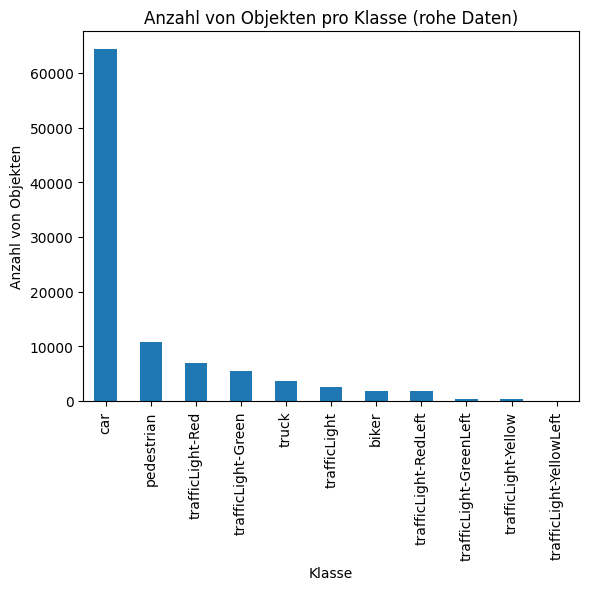

In [32]:
print(annotationsFiltered['class'].value_counts())
annotationsFiltered['class'].value_counts().plot(kind='bar')
plt.title("Anzahl von Objekten pro Klasse (rohe Daten)")
plt.xlabel("Klasse")
plt.ylabel("Anzahl von Objekten")
# plt.savefig('classDistribution_raw.png', bbox_inches='tight')

### Data Balancing

Da die Klasse 'trafficLight' insbesondere die Aufteilung in die Unterklassen 'trafficLight-Red', 'trafficLight-Green', 'trafficLight-RedLeft', 'trafficLight-GreenLeft', 'trafficLight-Yellow' und 'trafficLight-YellowLeft' unterrepräsentiert sind werden diese zu einer Klasse mit dem Namen 'trafficLight' mit der Interger-Nummer 5 zusammengelegt.

In [8]:
annotationsFiltered = pd.read_csv(os.path.join(datasetDirDST, '_annotations.csv'))

In [9]:
to_replace = ['trafficLight-Red', 'trafficLight-Green', 'trafficLight-RedLeft', 'trafficLight-GreenLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft']
replacement = 'trafficLight'
annotationsFiltered['class'] = annotationsFiltered['class'].replace(to_replace, replacement)

In [25]:
# annotationsFiltered = pd.read_csv(os.path.join(datasetDirDST, '_annotations_newClasses.csv'))

class
car             64399
trafficLight    17250
pedestrian      10806
truck            3623
biker            1864
Name: count, dtype: int64


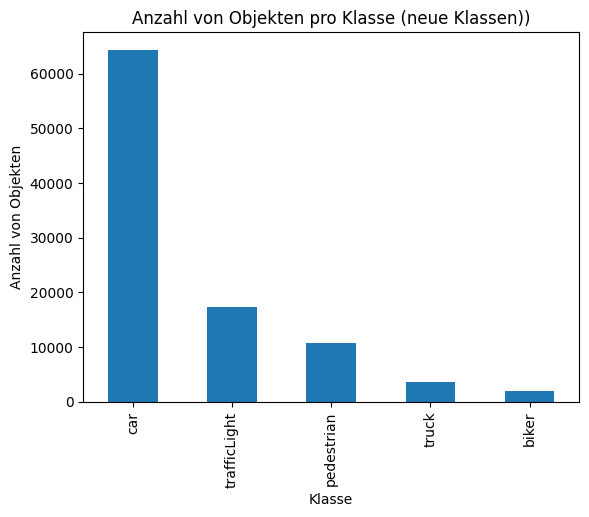

In [28]:
print(annotationsFiltered['class'].value_counts())
annotationsFiltered['class'].value_counts().plot(kind='bar')
plt.title("Anzahl von Objekten pro Klasse (neue Klassen))")
plt.xlabel("Klasse")
plt.ylabel("Anzahl von Objekten")
# plt.savefig('classDistribution_newClasses.png', bbox_inches='tight')

In [12]:
annotationsFiltered.to_csv(os.path.join(datasetDirDST, '_annotations_newClasses.csv'), index=False)

### Teile Daten in Train/Val/Test auf

In [34]:
annotationsFiltered = pd.read_csv(os.path.join(datasetDirDST, '_annotations_newClasses.csv'))

In [35]:
# Teile annotations in Trainings-, Validation- und Testdaten auf
imageFilenames = annotationsFiltered['filename'].unique()
trainFilenames, valFilenames = train_test_split(imageFilenames, test_size=0.3, random_state=42)
valFilenames, testFilenames = train_test_split(valFilenames, test_size=0.33, random_state=42)

trainAnnnotations = annotationsFiltered[annotationsFiltered['filename'].isin(trainFilenames)]
valAnnnotations = annotationsFiltered[annotationsFiltered['filename'].isin(valFilenames)]
testAnnnotations = annotationsFiltered[annotationsFiltered['filename'].isin(testFilenames)]

trainAnnnotations.to_csv(os.path.join(datasetDirDST, '_train_annotations_newClasses.csv'), index=False)
valAnnnotations.to_csv(os.path.join(datasetDirDST, '_val_annotations_newClasses.csv'), index=False)
testAnnnotations.to_csv(os.path.join(datasetDirDST, '_test_annotations_newClasses.csv'), index=False)

In [36]:
lengthTrain = len(trainAnnnotations['filename'].unique())
lengthVal = len(valAnnnotations['filename'].unique())
lengthTest = len(testAnnnotations['filename'].unique())
lengthFull = len(annotationsFiltered['filename'].unique())

print("Anzahl von Trainingssamples [%]: ", round(lengthTrain/lengthFull * 100))
print("Anzahl von Validationsamples [%]: ", round(lengthVal/lengthFull * 100))
print("Anzahl von Testsamples [%]: ", round(lengthTest/lengthFull * 100))

Anzahl von Trainingssamples [%]:  70
Anzahl von Validationsamples [%]:  20
Anzahl von Testsamples [%]:  10


In [37]:
# Prüfe ob jede Klasse in jeder der drei Datensätze vorkommt
trainClasses = trainAnnnotations['class'].unique()
valClasses = valAnnnotations['class'].unique()
testClasses = testAnnnotations['class'].unique()

print("Klassen in Trainingsdaten: ", trainClasses)
print("Klassen in Validationsdaten: ", valClasses)
print("Klassen in Testdaten: ", testClasses)

Klassen in Trainingsdaten:  ['pedestrian' 'car' 'biker' 'truck' 'trafficLight']
Klassen in Validationsdaten:  ['car' 'pedestrian' 'truck' 'biker' 'trafficLight']
Klassen in Testdaten:  ['car' 'trafficLight' 'biker' 'truck' 'pedestrian']


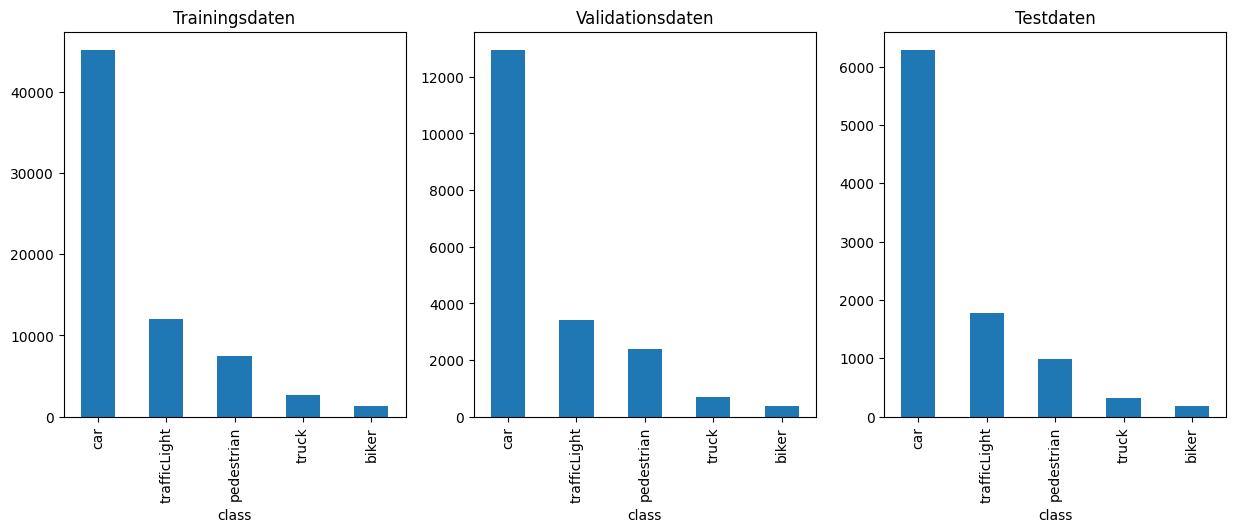

In [38]:
# Plotte das vorkommen der Klassen in den Datensätzen in einem Balkendiagramm
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
trainAnnnotations['class'].value_counts().plot(kind='bar', title='Trainingsdaten')
plt.subplot(1, 3, 2)
valAnnnotations['class'].value_counts().plot(kind='bar', title='Validationsdaten')
plt.subplot(1, 3, 3)
testAnnnotations['class'].value_counts().plot(kind='bar', title='Testdaten')
plt.show()

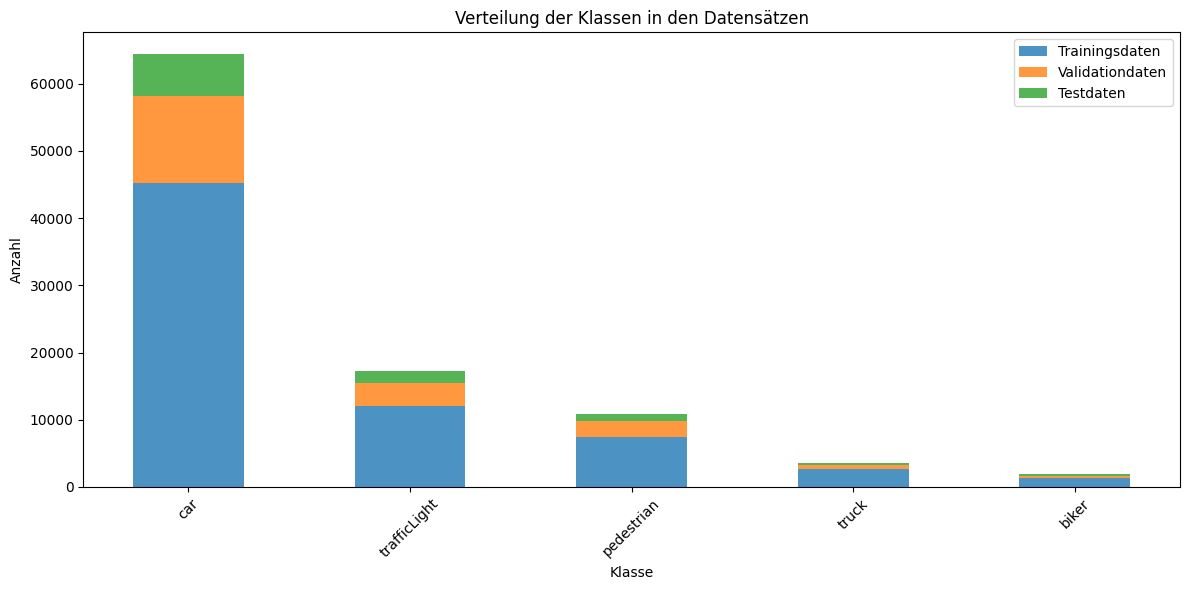

In [43]:
# Plotte das vorkommen der Klassen in den Datensätzen in einem Balkendiagramm

# Funktion zum Plotten eines Balkendiagramms mit Farben für jeden Balken
def plot_stacked_bar(dataset, offset, title):
    class_counts = dataset['class'].value_counts()
    classes = class_counts.index
    plt.bar(np.arange(len(classes)), class_counts, bottom=offset, label=title, align='center', alpha=0.8, width=0.5)
    plt.xticks(np.arange(len(classes)), classes, rotation=45)


plt.figure(figsize=(12, 6))
#colors = ['blue', 'green', 'red']
datasetTitles = ['Trainingsdaten', 'Validationdaten', 'Testdaten']

# Die Balken für jede Klasse und jeden Datensatz übereinander platzieren
offset = 0
for i, dataset in enumerate([trainAnnnotations, valAnnnotations, testAnnnotations]):
    plot_stacked_bar(dataset, offset, datasetTitles[i])
    offset += dataset['class'].value_counts()

plt.title('Verteilung der Klassen in den Datensätzen')
plt.ylabel('Anzahl')
plt.xlabel('Klasse')
plt.legend()
plt.tight_layout()
# plt.savefig('classDistribution_newClassesTrainValTest.png', bbox_inches='tight')
plt.show()
